**CÓDIGO COMPLETO E INSTRUCCIONES para librería de kolmogorov

[Github click aquí](https://github.com/algorithmic-dynamics-lab/pybdm)

In [1]:
pip install git+https://github.com/sztal/pybdm.git

  Cloning https://github.com/sztal/pybdm.git to /tmp/pip-req-build-5ea13k8o
  Running command git clone -q https://github.com/sztal/pybdm.git /tmp/pip-req-build-5ea13k8o
  Stored in directory: /tmp/pip-ephem-wheel-cache-_tbn41_b/wheels/36/1a/04/b95e70e76388ff41060264a1438eb98b7742c1393fce2b66c4
Successfully built bdm


In [2]:
import keras
import numpy as np
from bdm import BDM
import random
from keras.preprocessing.sequence import pad_sequences

# Initialize BDM object
# ndim argument specifies dimensionality of BDM
bdm = BDM(ndim=1)

tamaño_max=20 #tamaño maximo de las secuencias, el mínimo es 12
num=30000 #num secuencias-1
X=[]
Y=np.zeros((num+1,1))

#dprob=1/num

#prob=0
  
for i in range(num+1):
  ones_prob=random.randint(0,100)/100 

  if ones_prob>0.95: #probabilidad de obtener una secuencia de únicamente unos
    tamaño=random.randint(12,tamaño_max) #elegimos tamaño de la secuencia en turno al azar entre 12 y tamaño max
    sec=np.random.choice(2, tamaño,p=[0,1]).reshape(1,tamaño)
    X.append(sec[0].tolist())
    Y[i]=bdm.bdm(sec[0])
    
  else:
    prob=random.randint(0,100)/100
    tamaño=random.randint(12,tamaño_max) #elegimos tamaño de la secuencia en turno al azar entre 12 y tamaño max
    sec=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
    X.append(sec[0].tolist())
    Y[i]=bdm.bdm(sec[0])
    #prob+=dprob

#print(X)
X=pad_sequences(X,value=-1) #hacemos padding para rellenar las secuencias más cortas que el tamaño max
#print(X)
#print(Y)

Using TensorFlow backend.


In [3]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import PReLU
from keras.layers import ELU
from keras.layers import Dropout
from keras.utils import plot_model

def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=tamaño_max, input_shape = (tamaño_max,))) #input shape es la longitud de cada vector de entrada, units es el numero de neuronas
    #keras.layers.Dropout(0.25) #dropout de 25% (neuronas a apagar en cada epoch) #creo que esto no funciona
    #regressor.add(Dense(units=900,activation='relu')) 
    #regressor.add(Dense(units=900,activation='relu')) 
    #regressor.add(Dense(units=900,activation='relu')) 
    #regressor.add(PReLU(alpha_initializer='zeros', weights=None))
    #regressor.add(LeakyReLU(alpha=0.01))
    #regressor.add(Dropout(0.25)) #dropout de 25% (neuronas a apagar en cada epoch) #este si funciona!!
    regressor.add(ELU(alpha=1)) 
    regressor.add(Dense(units=int(round(2*(tamaño_max)/3))))
    regressor.add(ELU(alpha=1)) 
    regressor.add(Dense(units=1,activation='linear')) #salida solo una neurona
    regressor.compile(optimizer='Nadam', loss='mean_squared_error',  metrics=['mean_squared_error','mean_absolute_error',"mean_absolute_percentage_error"])
    #regressor.compile(optimizer='Nadam', loss='mean_squared_logarithmic_error',  metrics=['mean_squared_error','mean_absolute_error',"mean_absolute_percentage_error"])
    return regressor

build_regressor().summary()
plot_model(build_regressor(), to_file='nn.png',show_shapes=True) #guardamos una imagen del modelo como grafo

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download("nn.png") # si queremos descargar el archivo a la carpeta de descargas

W0704 03:56:09.189124 140635851777920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 03:56:09.211479 140635851777920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 03:56:09.214026 140635851777920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 03:56:09.249507 140635851777920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
elu_1 (ELU)                  (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                273       
_________________________________________________________________
elu_2 (ELU)                  (None, 13)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 14        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [0]:
iteraciones=2500 #epochs
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=20,epochs=iteraciones,validation_split=0.2, shuffle=True,verbose=2)


In [18]:
import time #para ver cuanto tarda
tic=time.time()

results=regressor.fit(X,Y)
print('Tiempo de procesamiento (secs): ', time.time()-tic)

Train on 24000 samples, validate on 6001 samples
Epoch 1/2500
 - 4s - loss: 54.5810 - mean_squared_error: 54.5810 - mean_absolute_error: 4.3962 - mean_absolute_percentage_error: 14.8456 - val_loss: 3.8480 - val_mean_squared_error: 3.8480 - val_mean_absolute_error: 1.5984 - val_mean_absolute_percentage_error: 5.4470
Epoch 2/2500
 - 4s - loss: 3.2584 - mean_squared_error: 3.2584 - mean_absolute_error: 1.4531 - mean_absolute_percentage_error: 4.8964 - val_loss: 2.9882 - val_mean_squared_error: 2.9882 - val_mean_absolute_error: 1.3907 - val_mean_absolute_percentage_error: 4.6342
Epoch 3/2500
 - 4s - loss: 2.7732 - mean_squared_error: 2.7732 - mean_absolute_error: 1.3308 - mean_absolute_percentage_error: 4.4628 - val_loss: 2.7836 - val_mean_squared_error: 2.7836 - val_mean_absolute_error: 1.3565 - val_mean_absolute_percentage_error: 4.5907
Epoch 4/2500
 - 4s - loss: 2.5482 - mean_squared_error: 2.5482 - mean_absolute_error: 1.2657 - mean_absolute_percentage_error: 4.2333 - val_loss: 2.5897 

In [22]:
#comprobamos que funciona el modelo
tamaño=random.randint(12,tamaño_max) #elegimos tamaño de la secuencia en turno al azar entre 12 y tamaño max
prueba=np.random.choice(2, tamaño).reshape(1,tamaño)
prueba_pad=pad_sequences(prueba,value=-1, maxlen=tamaño_max)
print(tamaño)
print(prueba)
print(regressor.predict(prueba_pad))
print(bdm.bdm(prueba[0]))

17
[[1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1]]
33.980724
33.01980468377942


In [0]:
#experimento para comprobar como funciona el modelo

def experimento(num_exps,tamaño_max):
  tamaño=random.randint(12,tamaño_max) #elegimos tamaño de las secuencias a usar en el experimento
  P=np.zeros((num_exps))
  Kolmo=np.zeros((num_exps))
  Kolmo_neuro=np.zeros((num_exps))
  dprob=1/num_exps

  prob=0
  for i in range(num_exps):
    sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
    sequ_pad=pad_sequences(sequ,value=-1, maxlen=tamaño_max)
    P[i]=prob
    Kolmo_neuro[i]=regressor.predict(sequ_pad)
    Kolmo[i]=bdm.bdm(sequ[0])
    prob+=dprob
  return P,Kolmo,Kolmo_neuro,tamaño


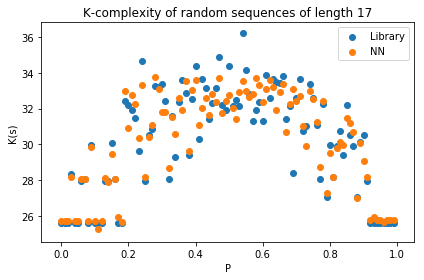

In [24]:
import matplotlib.pyplot as plt
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
num_tamaños=1

for i in range(num_tamaños):
  result=experimento(num_exps,tamaño_max)
  P=result[0]
  Kolmo=result[1]
  Kolmo_neuro=result[2]
  tamaño=result[3]
  plt.subplot(num_tamaños,1,i+1)
  plt.scatter(P,Kolmo,label="Library")
  plt.scatter(P,Kolmo_neuro,label="NN")
  plt.xlabel('P')
  plt.ylabel('K(s)')
  plt.title('K-complexity of random sequences of length '+str(tamaño))

plt.tight_layout()
plt.legend()
plt.show()
  

In [0]:
#guardamos los datos
import csv

with open('Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('Kolmo'+str(tamaño)+'.csv')
files.download('P'+str(tamaño)+'.csv')

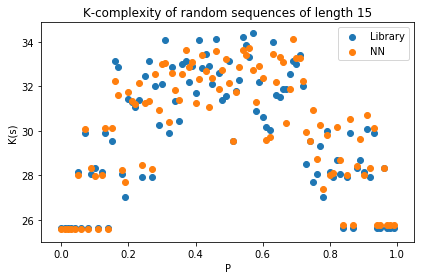

In [27]:
import matplotlib.pyplot as plt
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
num_tamaños=1

for i in range(num_tamaños):
  result=experimento(num_exps,tamaño_max)
  P=result[0]
  Kolmo=result[1]
  Kolmo_neuro=result[2]
  tamaño=result[3]
  plt.subplot(num_tamaños,1,i+1)
  plt.scatter(P,Kolmo,label="Library")
  plt.scatter(P,Kolmo_neuro,label="NN")
  plt.xlabel('P')
  plt.ylabel('K(s)')
  plt.title('K-complexity of random sequences of length '+str(tamaño))

plt.tight_layout()
plt.legend()
plt.show()

In [0]:
#guardamos los datos
import csv

with open('Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('Kolmo'+str(tamaño)+'.csv')
files.download('P'+str(tamaño)+'.csv')

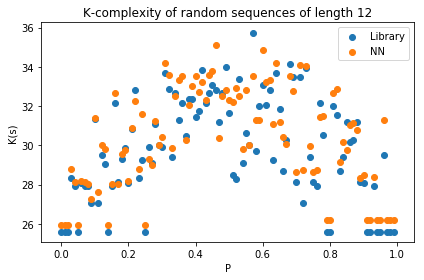

In [35]:
import matplotlib.pyplot as plt
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
num_tamaños=1

for i in range(num_tamaños):
  result=experimento(num_exps,tamaño_max)
  P=result[0]
  Kolmo=result[1]
  Kolmo_neuro=result[2]
  tamaño=result[3]
  plt.subplot(num_tamaños,1,i+1)
  plt.scatter(P,Kolmo,label="Library")
  plt.scatter(P,Kolmo_neuro,label="NN")
  plt.xlabel('P')
  plt.ylabel('K(s)')
  plt.title('K-complexity of random sequences of length '+str(tamaño))

plt.tight_layout()
plt.legend()
plt.show()

In [0]:
#guardamos los datos
import csv

with open('Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('Kolmo'+str(tamaño)+'.csv')
files.download('P'+str(tamaño)+'.csv')

In [0]:
#Función para usar el modelo entrenado con secuencias de mayor longitud a las entrenadas
#import keras
#from keras.preprocessing.sequence import pad_sequences
#import math
#import collections
#import numpy as np

#tamaño_max=100
#def kolmo(seq ,counter=1,complexity=0):
 # if len(seq[0])<=tamaño_max:
  #  sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max)
   # complexity=regressor.predict(sequence) + math.log(counter,2)
    #return complexity
  #else:
   # splitted=np.array_split(seq[0],math.ceil(len(seq[0])/tamaño_max))
    #splitted_tuple=map(tuple,splitted)
    #counts=collections.Counter(splitted_tuple)#contamos el número de veces que se repite cada secuencia
    #for i in range(len(splitted)):
     # counter=counts[tuple(splitted[i])] #contamos el número de veces que se repite la secuencia en turno
      #complexity+=kolmo([splitted[i]],counter,complexity)
  #return complexity

In [0]:
#Función para usar el modelo entrenado con secuencias de mayor longitud a las entrenadas
#OPCIÓN 2 Cambiamos ciclo for por map
#MUCHO MÁS RAPIDO!!!!
import keras
from keras.preprocessing.sequence import pad_sequences
import math
import collections
import numpy as np

def kolmo(seq ,counter=1,complexity=0):
  #print(seq)
  #if len(seq[0])<=tamaño_max:
  if (len(seq[0])<=tamaño_max and len(seq[0])>11): #tamaño máximo con el que entrenamos es 12
    sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max)
    complexity=regressor.predict(sequence) + math.log(counter,2)
    return complexity
  elif len(seq[0])>tamaño_max: #si es mayor a tamaño maximo la cortamos, si es menor a 12 la ignoramos
    splitted=np.array_split(seq[0],math.ceil(len(seq[0])/tamaño_max))
    splitted_tuple=map(tuple,splitted)
    counts=collections.Counter(splitted_tuple)#contamos el número de veces que se repite cada secuencia
    
    #print(list(map(tuple,[splitted])))
    #tuple_names=list(map(tuple,[splitted]))
    #reps=counts[map(tuple,splitted)]
    #print(counts.values())
    #print(splitted)
    complexity_list=list(map(kolmo,[splitted],counts.values()))
    #print(type(complexity_list))
    #print(complexity_list[0])
    complexity=sum(complexity_list[0])
    #complexity+=map(lambda a,b,c: kolmo(a,b,c) for a,b,c in zip([splitted], counts[map(tuple,splitted)],complexity))
    #cambiar esto de abajo por funcion map de arriba revisar p multiples argumentos
    #for i in range(len(splitted)):
     # counter=counts[tuple(splitted[i])] #contamos el número de veces que se repite la secuencia en turno
      #complexity+=kolmo([splitted[i]],counter,complexity)
  else:
    complexity=0
    return complexity
      
      
  return complexity

In [83]:
#comprobamos que funciona el modelo con secuencias de tamaño mayor al entrenado
tamaño=random.randint(12,10*tamaño_max) #elegimos tamaño de la secuencia en turno al azar entre 12 y tamaño max
prueba=np.random.choice(2, tamaño).reshape(1,tamaño)
#print(prueba)
print("tamaño=",tamaño)
print(kolmo(prueba))
print(bdm.bdm(prueba[0]))
#print(prueba[0])
#splitted=np.array_split(prueba[0],math.ceil(len(prueba[0])/3))
#print(splitted)
#print(splitted[0].reshape(1,tamaño))
#print(len(splitted[1]))
#print(splitted[1])
#pad_sequences([splitted[1]],value=-1, maxlen=15)

tamaño= 103
194.0098991394043
263.33035959246473


In [0]:
#experimento para comprobar como funciona el modelo con secuencias mayores a las entrenadas
tamaño=random.randint(tamaño_max,10*tamaño_max) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

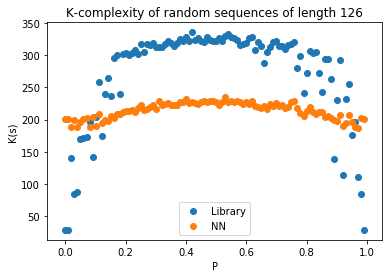

In [41]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="Library")
plt.scatter(P,Kolmo_neuro,label="NN")
plt.xlabel('P')
plt.ylabel('K(s)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('general_Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('general_Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('general_P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('general_Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('general_Kolmo'+str(tamaño)+'.csv')
files.download('general_P'+str(tamaño)+'.csv')

In [0]:
#experimento para comprobar como funciona el modelo con secuencias mayores a las entrenadas
tamaño=random.randint(tamaño_max,4*tamaño_max) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

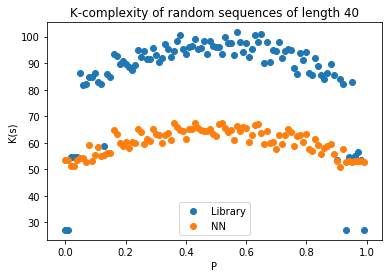

In [44]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="Library")
plt.scatter(P,Kolmo_neuro,label="NN")
plt.xlabel('P')
plt.ylabel('K(s)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('general_Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('general_Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('general_P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('general_Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('general_Kolmo'+str(tamaño)+'.csv')
files.download('general_P'+str(tamaño)+'.csv')

In [0]:
#experimento para comprobar como funciona el modelo con secuencias mayores a las entrenadas
tamaño=random.randint(tamaño_max,20*tamaño_max) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

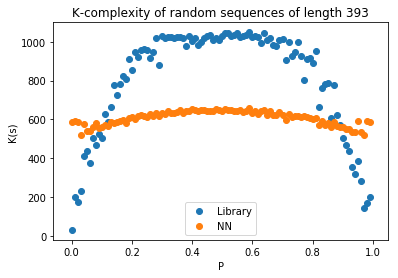

In [50]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="Library")
plt.scatter(P,Kolmo_neuro,label="NN")
plt.xlabel('P')
plt.ylabel('K(s)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('general_Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('general_Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('general_P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('general_Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('general_Kolmo'+str(tamaño)+'.csv')
files.download('general_P'+str(tamaño)+'.csv')

In [93]:
#experimento error y tiempo
import time

long_max=100 #con 10 000 tarda aprox. 20 minutos
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(21,long_max+1):
  print(i)
  prueba=np.random.choice(2, i).reshape(1,i)
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start #Return the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of consecutive calls is valid.
  start = time.process_time()
  lib[i-12]=bdm.bdm(prueba[0])
  time_lib[i-12]=time.process_time() - start
  longs[i-12]=i

  

21


TypeError: ignored

(0, 50)

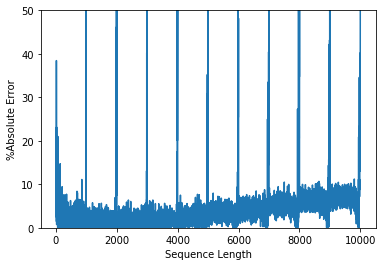

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,50)

In [0]:
time.get_clock_info('process_time') #verificamos resolución

namespace(adjustable=False, implementation='clock_gettime(CLOCK_PROCESS_CPUTIME_ID)', monotonic=True, resolution=1e-09)

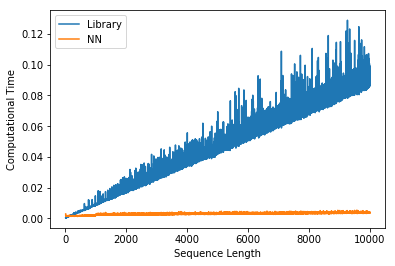

In [0]:
plt.plot(longs,time_lib,label="Library")
plt.plot(longs,time_mi_lib,label="NN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time') #computational
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(mi_lib)
csvFile.close()

with open('lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(lib)
csvFile.close()

with open('longs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(longs)
csvFile.close()

with open('time_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_lib)
csvFile.close()

with open('time_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_mi_lib)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('mi_lib.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('lib.csv')
files.download('longs.csv')
files.download('time_lib.csv')
files.download('time_mi_lib.csv')

In [0]:
#ahora contra la librería en paralelo de BDM
#experimento error y tiempo
#sin tomar en cuenta el tiempo para segmentar la secuencia
import time
import numpy as np
from joblib import Parallel, delayed
from bdm import BDM
from bdm.utils import slice_dataset

bdm = BDM(ndim=1)

kernels=4
long_max=100 #con 10 000 tardó aprox una hora
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, kernels*i).reshape(1,kernels*i) #usamos secuencias de tamaño múltiplo del num de kernels
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start
  
  if len(prueba[0])>=48:
    counters_demo = Parallel(n_jobs=4) \
    (delayed(bdm.count_and_lookup)(d) for d in slice_dataset(prueba[0], (round(len(prueba[0])/kernels),))) #tam min de secuencias es 12
    start = time.process_time()
    lib[i-12]=bdm.compute_bdm(*counters_demo)
    time_lib[i-12]=time.process_time() - start
  else:
    start = time.process_time()
    lib[i-12]=bdm.bdm(prueba[0])
    time_lib[i-12]=time.process_time() - start
  longs[i-12]=kernels*i

(0, 100)

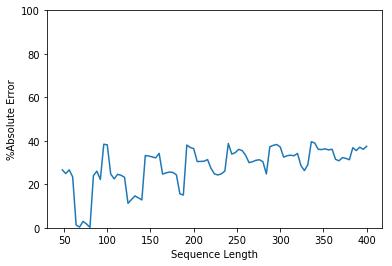

In [68]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,100)

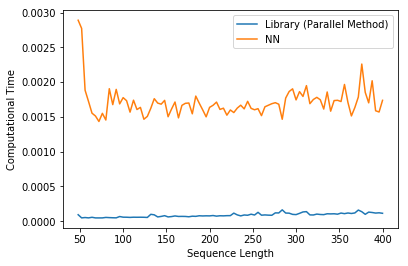

In [69]:
plt.plot(longs,time_lib,label="Library (Parallel Method)")
plt.plot(longs,time_mi_lib,label="NN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('para_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(mi_lib)
csvFile.close()

with open('para_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(lib)
csvFile.close()

with open('para_longs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(longs)
csvFile.close()

with open('para_time_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_lib)
csvFile.close()

with open('para_time_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_mi_lib)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('para_mi_lib.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('para_lib.csv')
files.download('para_longs.csv')
files.download('para_time_lib.csv')
files.download('para_time_mi_lib.csv')

In [0]:
#ahora contra la librería en paralelo de BDM
#experimento error y tiempo
#tomando en cuenta el tiempo necesario para segmemtar la secuencia
import time
import numpy as np
from joblib import Parallel, delayed
from bdm import BDM
from bdm.utils import slice_dataset

bdm = BDM(ndim=1)

kernels=4
long_max=100 #con 3000 tardó aprox 20 minutos
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, kernels*i).reshape(1,kernels*i) #usamos secuencias de tamaño múltiplo del num de kernels
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start
  
  if len(prueba[0])>=48:
    start = time.process_time()
    counters_demo = Parallel(n_jobs=4) \
    (delayed(bdm.count_and_lookup)(d) for d in slice_dataset(prueba[0], (round(len(prueba[0])/kernels),))) #tam min de secuencias es 12
    lib[i-12]=bdm.compute_bdm(*counters_demo)
    time_lib[i-12]=time.process_time() - start
  else:
    start = time.process_time()
    lib[i-12]=bdm.bdm(prueba[0])
    time_lib[i-12]=time.process_time() - start
  longs[i-12]=kernels*i

(0, 100)

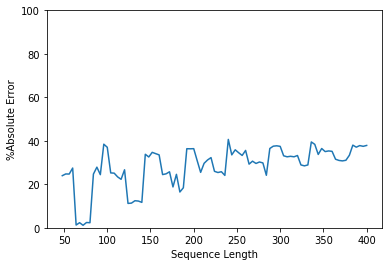

In [72]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,100)

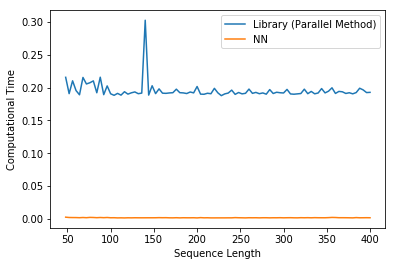

In [73]:
plt.plot(longs,time_lib,label="Library (Parallel Method)")
plt.plot(longs,time_mi_lib,label="NN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('para2_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(mi_lib)
csvFile.close()

with open('para2_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(lib)
csvFile.close()

with open('para2_longs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(longs)
csvFile.close()

with open('para2_time_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_lib)
csvFile.close()

with open('para2_time_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_mi_lib)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('para2_mi_lib.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('para2_lib.csv')
files.download('para2_longs.csv')
files.download('para2_time_lib.csv')
files.download('para2_time_mi_lib.csv')

Opción2:  Ahora cambiamos la función de pérdida por Mean Squared Logarithmic Error loss y la long max de las secuencias de entrenamiento en 10000 con 100 000 secuencias y por lo menos 10 000 epochs

In [0]:
tamaño=1000 #elegimos tamaño de la secuencia en turno al azar entre 12 y tamaño max
prueba=np.random.choice(2, tamaño).reshape(1,tamaño)
print(bdm.bdm(prueba[0]))

2655.3498418727327


**De aquí para abajo es código para guardar la red entrenada con sus pesos y también para cargarla y poder seguir realizando experimentos con ella!**

In [75]:
#Guardamos el modelo y los pesos
# save model and architecture to single file

regressor.model.save("model_30000 seqs_size_12a20_epochs_2500.h5")
#regressor.model.save_weights("weights.h5")
print("Saved model to disk")

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download("model_30000 seqs_size_12a20_epochs_2500.h5") # si queremos descargar el archivo a la carpeta de descargas

Saved model to disk


In [0]:
#Cargamos el modelo y los pesos
#solo para anaconda
import keras
from keras.models import load_model
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
# Recreate the exact same model, including weights and optimizer.
new_model =keras.models.load_model("model_30000 seqs_size_1000_epochs_4000.h5")

Saving modelV3-1000 epochs (2).h5 to modelV3-1000 epochs (2).h5


ValueError: ignored

In [0]:
#comprobamos que funciona el modelo
import random
import numpy as np
import keras
from keras.preprocessing.sequence import pad_sequences
tamaño_max=1000

tamaño=random.randint(12,tamaño_max) #elegimos tamaño de la secuencia en turno al azar entre 12 y tamaño max
prueba=np.random.choice(2, tamaño).reshape(1,tamaño)
prueba_pad=pad_sequences(prueba,value=-1, maxlen=tamaño_max)
print(prueba)
print(new_model.predict(prueba_pad)[0,0]) #ahora solo debemos agregar [0,0] para poder predecir y los algoritmos serán los mismos
print(bdm.bdm(prueba[0]))

NameError: ignored

mejoras:
 *  cuando el tamaño de la secuencia sea mayor que el tamaño maximo, hacer padding para cortarla en pedazos de tamaño maximo y un residuo, calcular la complejidad de estos pedazos por separado y sumar el resultado para obtener la complejidad de la secuencia inicial (usar ec 7 de art decomposition method?). (usar como tamaño max 100 y entrenar con 1000 epochs)

* Entrenar mi red en collab usando GPU. Y después crear una librería con mi método ya listo para ser ejecutado en secuencias de cualquier longitud.

* como seguir entrenando sin reinicializar los pesos desde cero

  ver las funciones para hacer padding en [pagina](https://machinelearningmastery.com/data-preparation-variable-length-input-sequences-sequence-prediction/)


o red recurrente o lstm?